In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
sns.set()

In [2]:
features =['Matches_avg_team1','Bat_Inns_avg_team1','NO_avg_team1','Bat_Runs_avg_team1','HS_avg_team1','HS_max_team1',
         'SR_bat_avg_team1','SR_bat_max_team1','100s_avg_team1','100s_max_team1','50s_avg_team1','50s_max_team1',
         '4s_avg_team1','4s_max_team1','6s_avg_team1','6s_max_team1','Bowl_Inns_avg_team1','Wkts_avg_team1',
         'Wkts_max_team1','Bowl_ave_avg_team1','Bowl_ave_min_team1','Bowl_Econ_avg_team1','Bowl_Econ_min_team1', 
         'SR_bowl__avg_team1','SR_bowl__min_team1', '4w_avg_team1','4w_max_team1','5w_avg_team1','5w_max_team1',
         'Matches_avg_team2','Bat_Inns_avg_team2','NO_avg_team2','Bat_Runs_avg_team2','HS_avg_team2','HS_max_team2',
         'SR_bat_avg_team2','SR_bat_max_team2','100s_avg_team2','100s_max_team2','50s_avg_team2','50s_max_team2',
         '4s_avg_team2','4s_max_team2','6s_avg_team2','6s_max_team2','Bowl_Inns_avg_team2','Wkts_avg_team2',
         'Wkts_max_team2','Bowl_ave_avg_team2','Bowl_ave_min_team2','Bowl_Econ_avg_team2','Bowl_Econ_min_team2', 
         'SR_bowl__avg_team2','SR_bowl__min_team2', '4w_avg_team2','4w_max_team2','5w_avg_team2','5w_max_team2']

In [3]:
data = pd.read_csv("TrainingData.csv")
data = data.drop(['Unnamed: 0','match_url'], axis = 1)
data

,Output,Matches_avg_team1,Bat_Inns_avg_team1,NO_avg_team1,Bat_Runs_avg_team1,HS_avg_team1,HS_max_team1,SR_bat_avg_team1,SR_bat_max_team1,100s_avg_team1,...,Bowl_ave_avg_team2,Bowl_ave_min_team2,Bowl_Econ_avg_team2,Bowl_Econ_min_team2,SR_bowl__avg_team2,SR_bowl__min_team2,4w_avg_team2,4w_max_team2,5w_avg_team2,5w_max_team2
0,0,27.636364,17.909091,4.454545,347.545455,44.272727,172.0,112.213636,150.24,0.181818,...,36.298750,20.79,8.041250,7.18,26.450000,16.8,0.500000,2.0,0.250000,2.0
1,0,23.090909,17.727273,4.181818,355.000000,46.363636,172.0,120.106364,150.24,0.181818,...,38.025714,20.79,8.152857,7.18,27.371429,16.8,0.428571,2.0,0.285714,2.0
2,1,24.727273,17.454545,4.090909,351.454545,45.727273,172.0,119.066364,150.24,0.181818,...,35.696250,19.39,8.038750,7.18,25.950000,16.0,0.375000,2.0,0.250000,2.0
3,0,22.200000,18.000000,3.300000,266.300000,43.700000,122.0,93.400000,126.58,0.100000,...,24.142000,16.00,8.111667,6.62,18.860000,14.5,0.500000,1.0,0.000000,0.0
4,0,29.636364,19.600000,7.800000,422.300000,40.600000,110.0,100.942000,142.19,0.200000,...,35.537778,18.85,8.516000,6.94,24.666667,16.2,0.200000,1.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756,1,58.000000,44.909091,9.545455,871.545455,55.454545,99.0,115.060909,150.00,0.000000,...,31.953750,19.39,7.933750,6.13,23.587500,16.0,0.375000,2.0,0.125000,1.0
757,0,56.181818,48.181818,7.818182,866.181818,54.454545,103.0,114.651818,136.10,0.090909,...,40.565714,20.25,7.818571,6.66,29.128571,17.2,0.428571,2.0,0.000000,0.0
758,1,40.444444,27.777778,5.222222,469.888889,59.000000,133.0,111.307778,125.21,0.111111,...,25.576667,19.70,7.420000,6.35,21.266667,18.0,0.142857,1.0,0.000000,0.0
759,1,35.555556,29.500000,5.750000,654.125000,60.125000,145.0,124.335000,158.92,0.500000,...,32.204286,21.96,8.170000,6.77,23.657143,19.0,0.142857,1.0,0.000000,0.0


In [4]:
X = data.drop(['Output'], axis=1)
y = data['Output']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=28)

In [5]:
LogReg = LogisticRegression(solver='lbfgs',random_state=0, max_iter=8000)
RF = RandomForestClassifier(n_estimators=1000, max_depth=3, min_samples_leaf=3, max_features=20)
SVMclf = svm.SVC(kernel='linear')

# Fitting the three binary classifiers
LogReg.fit(X_train, y_train) 
RF.fit(X_train, y_train)
SVMclf.fit(X_train, y_train)

LogRegTrainScore = LogReg.score(X_train, y_train)
LogRegTestScore = LogReg.score(X_test, y_test)
RFTrainScore = RF.score(X_train, y_train)
RFTestScore = RF.score(X_test, y_test)
SVMTrainScore = SVMclf.score(X_train, y_train)
SVMTestScore = SVMclf.score(X_test, y_test)

print("LogReg Training set accuracy: ", '%.3f'%(LogRegTrainScore))
print("LogReg Test set accuracy: ", '%.3f'%(LogRegTestScore))
print("\nRF Training set accuracy: ", '%.3f'%(RFTrainScore))
print("RF Test set accuracy: ", '%.3f'%(RFTestScore))
print("\nSVM Training set accuracy: ", '%.3f'%(SVMTrainScore))
print("SVM Test set accuracy: ", '%.3f'%(SVMTestScore))

LogReg Training set accuracy:  0.731
LogReg Test set accuracy:  0.642

RF Training set accuracy:  0.744
RF Test set accuracy:  0.638

SVM Training set accuracy:  0.737
SVM Test set accuracy:  0.607


Feature: Matches_avg_team1 Score: 0.01552
Feature: Bat_Inns_avg_team1 Score: 0.00983
Feature: NO_avg_team1 Score: 0.01856
Feature: Bat_Runs_avg_team1 Score: 0.01851
Feature: HS_avg_team1 Score: 0.00819
Feature: HS_max_team1 Score: 0.00746
Feature: SR_bat_avg_team1 Score: 0.01544
Feature: SR_bat_max_team1 Score: 0.00433
Feature: 100s_avg_team1 Score: 0.01075
Feature: 100s_max_team1 Score: 0.00050
Feature: 50s_avg_team1 Score: 0.02220
Feature: 50s_max_team1 Score: 0.00513
Feature: 4s_avg_team1 Score: 0.00697
Feature: 4s_max_team1 Score: 0.00431
Feature: 6s_avg_team1 Score: 0.05535
Feature: 6s_max_team1 Score: 0.00705
Feature: Bowl_Inns_avg_team1 Score: 0.00967
Feature: Wkts_avg_team1 Score: 0.02564
Feature: Wkts_max_team1 Score: 0.00837
Feature: Bowl_ave_avg_team1 Score: 0.00983
Feature: Bowl_ave_min_team1 Score: 0.00798
Feature: Bowl_Econ_avg_team1 Score: 0.02596
Feature: Bowl_Econ_min_team1 Score: 0.00524
Feature: SR_bowl__avg_team1 Score: 0.02092
Feature: SR_bowl__min_team1 Score: 0.0

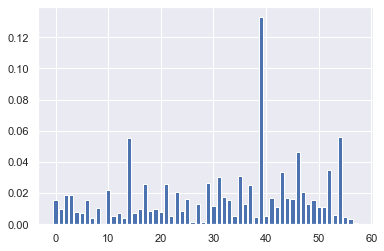

In [6]:
importance = RF.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: '+ features[i] + ' Score: %.5f' % ( v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Testing fixtures

Feature: Matches_avg_team1 Score: 0.03564
Feature: Bat_Inns_avg_team1 Score: -0.16468
Feature: NO_avg_team1 Score: 0.21192
Feature: Bat_Runs_avg_team1 Score: -0.00592
Feature: HS_avg_team1 Score: 0.07127
Feature: HS_max_team1 Score: -0.02880
Feature: SR_bat_avg_team1 Score: -0.02439
Feature: SR_bat_max_team1 Score: -0.00607
Feature: 100s_avg_team1 Score: 0.49410
Feature: 100s_max_team1 Score: 0.00466
Feature: 50s_avg_team1 Score: 0.72734
Feature: 50s_max_team1 Score: -0.17458
Feature: 4s_avg_team1 Score: 0.02510
Feature: 4s_max_team1 Score: 0.01223
Feature: 6s_avg_team1 Score: 0.11254
Feature: 6s_max_team1 Score: -0.00813
Feature: Bowl_Inns_avg_team1 Score: -0.00178
Feature: Wkts_avg_team1 Score: 0.07207
Feature: Wkts_max_team1 Score: -0.00406
Feature: Bowl_ave_avg_team1 Score: -0.09968
Feature: Bowl_ave_min_team1 Score: -0.00925
Feature: Bowl_Econ_avg_team1 Score: 0.09518
Feature: Bowl_Econ_min_team1 Score: 0.26741
Feature: SR_bowl__avg_team1 Score: 0.16332
Feature: SR_bowl__min_team1

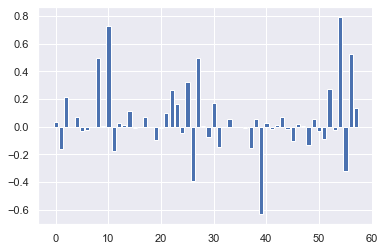

In [7]:
importance = LogReg.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: '+ features[i] + ' Score: %.5f' % ( v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [8]:
fixtures = pd.read_csv('Fixtures.csv')
fixtures = fixtures.drop(['Match No', 'Date', 'Venue', 'Time'], axis = 1)
fixtures['PredictedResult'] = np.nan
headers = ['Team1', 'Team2', 'PredictedResult']
fixtures.columns = headers
fixtures['Team1'] = fixtures['Team1'].str.replace("P.N.G.",'PNG')
fixtures['Team2'] = fixtures['Team2'].str.replace("P.N.G.",'PNG')
fixtures['Team1'] = fixtures['Team1'].str.replace(" ",'')
fixtures['Team2'] = fixtures['Team2'].str.replace(" ",'')
fixtures = fixtures.reset_index(drop=True)
fixtures

<ipython-input-8-9e1f75c73c2d>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  fixtures['Team1'] = fixtures['Team1'].str.replace("P.N.G.",'PNG')
<ipython-input-8-9e1f75c73c2d>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  fixtures['Team2'] = fixtures['Team2'].str.replace("P.N.G.",'PNG')


,Team1,Team2,PredictedResult
0,Oman,PNG,NaN
1,Bangladesh,Scotland,NaN
2,Ireland,Netherlands,NaN
3,SriLanka,Namibia,NaN
4,Scotland,PNG,NaN
5,Oman,Bangladesh,NaN
6,Namibia,Netherlands,NaN
7,SriLanka,Ireland,NaN
8,Bangladesh,PNG,NaN
9,Oman,Scotland,NaN


In [9]:
#First Group Stage
fixturesgroup = fixtures.iloc[0:12,:]
fixturesgroup

,Team1,Team2,PredictedResult
0,Oman,PNG,NaN
1,Bangladesh,Scotland,NaN
2,Ireland,Netherlands,NaN
3,SriLanka,Namibia,NaN
4,Scotland,PNG,NaN
5,Oman,Bangladesh,NaN
6,Namibia,Netherlands,NaN
7,SriLanka,Ireland,NaN
8,Bangladesh,PNG,NaN
9,Oman,Scotland,NaN


In [10]:
SquadData = pd.read_csv('SquadData.csv')
SquadData = SquadData.drop(['Unnamed: 0'], axis = 1)
SquadData['player_country'] = SquadData['player_country'].str.replace("P.N.G.",'PNG')
SquadData['player_country'] = SquadData['player_country'].str.replace(" ",'')
SquadData

<ipython-input-10-f696acbbaddb>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  SquadData['player_country'] = SquadData['player_country'].str.replace("P.N.G.",'PNG')


,player_country,Matches_avg,Bat_Inns_avg,NO_avg,Bat_Runs_avg,HS_avg,HS_max,SR_bat_avg,SR_bat_max,100s_avg,...,Bowl_ave_avg,Bowl_ave_min,Bowl_Econ_avg,Bowl_Econ_min,SR_bowl__avg,SR_bowl__min,4w_avg,4w_max,5w_avg,5w_max
0,Afghanistan,35.133333,27.400000,5.533333,555.466667,57.666667,162.0,125.007333,160.00,0.133333,...,19.708889,4.00,7.100000,6.00,16.077778,4.0,0.888889,3.0,0.333333,2.0
1,Australia,36.555556,25.388889,5.444444,542.555556,53.666667,172.0,127.463333,234.78,0.333333,...,23.718667,10.00,8.093750,6.25,18.120000,9.6,0.062500,1.0,0.125000,2.0
2,Bangladesh,42.357143,35.071429,5.785714,589.857143,45.571429,84.0,108.489286,144.00,0.000000,...,26.467778,15.55,7.442000,5.50,20.400000,14.9,0.900000,4.0,0.200000,1.0
3,England,39.937500,30.500000,7.312500,596.375000,53.562500,103.0,123.708125,167.47,0.125000,...,29.258182,20.76,8.532727,6.78,21.409091,12.0,0.454545,2.0,0.000000,0.0
4,India,38.533333,25.714286,6.428571,662.071429,47.642857,118.0,118.130714,197.14,0.428571,...,35.890000,19.57,7.792727,5.30,26.800000,14.6,0.454545,2.0,0.090909,1.0
5,Ireland,38.642857,31.357143,5.571429,549.285714,51.928571,124.0,117.232143,148.14,0.142857,...,27.105455,14.91,7.900000,7.00,20.281818,12.7,0.454545,2.0,0.000000,0.0
6,Namibia,13.266667,9.142857,2.571429,170.000000,36.000000,92.0,105.559286,180.00,0.000000,...,20.616000,10.80,6.914167,5.31,19.790000,11.0,0.166667,1.0,0.166667,1.0
7,Netherlands,30.357143,21.142857,5.071429,395.000000,52.428571,133.0,103.898571,137.20,0.071429,...,27.805455,16.00,7.924545,5.88,20.863636,13.9,0.545455,2.0,0.000000,0.0
8,NewZealand,37.866667,26.000000,5.333333,543.933333,51.333333,108.0,118.993333,157.28,0.200000,...,26.313333,11.71,8.519231,6.86,18.600000,8.5,0.538462,2.0,0.153846,1.0
9,Oman,20.153846,14.153846,3.000000,230.615385,38.769231,72.0,107.663846,171.42,0.000000,...,27.838889,16.25,7.135000,6.48,23.744444,14.3,0.700000,3.0,0.000000,0.0


In [11]:
def Predicitions(stage):
    NewDFTeam1 = []
    NewDFTeam2 = []
    for index, row in stage.iterrows():
        for i in range(len(SquadData)):
            if row['Team1'] == SquadData['player_country'][i]:
                NewDFTeam1 = SquadData.iloc[i]
            if row['Team2'] == SquadData['player_country'][i]:
                NewDFTeam2 = SquadData.iloc[i]
            newlist = []
            for k in range(1,len(NewDFTeam1)):
                newlist.append(NewDFTeam1[k])
            for j in range(1,len(NewDFTeam2)):
                newlist.append(NewDFTeam2[j])    

        dframe = pd.DataFrame(newlist) 
        df1_transposed = dframe.T
        df1_transposed.columns = features         
        df1_transposed

        if RF.predict(df1_transposed) == 1:
            stage['PredictedResult'][index] = row['Team1']
        else:
            stage['PredictedResult'][index] = row['Team2']

    return stage

In [12]:
Predicitions(fixturesgroup)

,Team1,Team2,PredictedResult
0,Oman,PNG,Oman
1,Bangladesh,Scotland,Bangladesh
2,Ireland,Netherlands,Ireland
3,SriLanka,Namibia,SriLanka
4,Scotland,PNG,Scotland
5,Oman,Bangladesh,Oman
6,Namibia,Netherlands,Namibia
7,SriLanka,Ireland,Ireland
8,Bangladesh,PNG,Bangladesh
9,Oman,Scotland,Oman


In [13]:
OmanPoints = 0
PNGPoints = 0
BangladeshPoints = 0
IrelandPoints = 0
NetherlandsPoints = 0
SriLankaPoints = 0
ScotlandPoints = 0
NamibiaPoints = 0

for i in range(len(fixturesgroup)):
    if fixturesgroup['PredictedResult'][i] == 'SriLanka':
        SriLankaPoints +=3
    if fixturesgroup['PredictedResult'][i] == 'Netherlands':
        NetherlandsPoints +=3
    if fixturesgroup['PredictedResult'][i] == 'Namibia':
        NamibiaPoints +=3
    if fixturesgroup['PredictedResult'][i] == 'Ireland':
        IrelandPoints +=3
    if fixturesgroup['PredictedResult'][i] == 'Bangladesh':
        BangladeshPoints +=3
    if fixturesgroup['PredictedResult'][i] == 'Oman':
        OmanPoints +=3
    if fixturesgroup['PredictedResult'][i] == 'P.N.G.':
        PNGPoints +=3
    if fixturesgroup['PredictedResult'][i] == 'Scotland':
        ScotlandPoints +=3

fixturegroupdata = {'Group1' : ['Ireland','Namibia','Netherlands','Sri Lanka'],
        'Group1Points' : [IrelandPoints, NamibiaPoints, NetherlandsPoints, SriLankaPoints],
        'Group2' : ['Bangladesh','Oman','P.N.G.','Scotland'],
        'Group2Points' : [BangladeshPoints, OmanPoints, PNGPoints, ScotlandPoints]}

fixturegroupdf = pd.DataFrame(fixturegroupdata)
fixturegroupdf['Group1'] = fixturegroupdf['Group1'].str.replace(" ",'')
fixturegroupdf['Group2'] = fixturegroupdf['Group2'].str.replace(" ",'')
fixturegroupdf1 = fixturegroupdf.sort_values(by='Group1Points',ascending=False)
fixturegroupdf1 = fixturegroupdf1.reset_index(drop=True)
fixturegroupdf2 = fixturegroupdf.sort_values(by=['Group2Points'],ascending=False)
fixturegroupdf2 = fixturegroupdf2.reset_index()

In [14]:
fixturessuper12 = fixtures.iloc[12:42,:]
fixturessuper12['Team1'] = fixturessuper12['Team1'].str.replace(" ",'')
fixturessuper12['Team2'] = fixturessuper12['Team2'].str.replace(" ",'')
fixturessuper12['Team1'] = fixturessuper12['Team1'].str.replace("A1",fixturegroupdf1['Group1'][0])
fixturessuper12['Team1'] = fixturessuper12['Team1'].str.replace("A2",fixturegroupdf1['Group1'][1])
fixturessuper12['Team1'] = fixturessuper12['Team1'].str.replace("B1",fixturegroupdf2['Group2'][0])
fixturessuper12['Team1'] = fixturessuper12['Team1'].str.replace("B2",fixturegroupdf2['Group2'][1])
fixturessuper12['Team2'] = fixturessuper12['Team2'].str.replace("A1",fixturegroupdf1['Group1'][0])
fixturessuper12['Team2'] = fixturessuper12['Team2'].str.replace("A2",fixturegroupdf1['Group1'][1])
fixturessuper12['Team2'] = fixturessuper12['Team2'].str.replace("B1",fixturegroupdf2['Group2'][0])
fixturessuper12['Team2'] = fixturessuper12['Team2'].str.replace("B2",fixturegroupdf2['Group2'][1])
fixturessuper12

,Team1,Team2,PredictedResult
12,Australia,SouthAfrica,NaN
13,England,WestIndies,NaN
14,Ireland,Bangladesh,NaN
15,India,Pakistan,NaN
16,Afghanistan,Oman,NaN
17,SouthAfrica,WestIndies,NaN
18,Pakistan,NewZealand,NaN
19,England,Bangladesh,NaN
20,Oman,Namibia,NaN
21,Australia,Ireland,NaN


In [15]:
Predicitions(fixturessuper12)

,Team1,Team2,PredictedResult
12,Australia,SouthAfrica,Australia
13,England,WestIndies,WestIndies
14,Ireland,Bangladesh,Ireland
15,India,Pakistan,Pakistan
16,Afghanistan,Oman,Afghanistan
17,SouthAfrica,WestIndies,WestIndies
18,Pakistan,NewZealand,Pakistan
19,England,Bangladesh,England
20,Oman,Namibia,Oman
21,Australia,Ireland,Australia


In [16]:
fixturessuper12 = fixturessuper12.reset_index(drop=True)
fixturessuper12

,Team1,Team2,PredictedResult
0,Australia,SouthAfrica,Australia
1,England,WestIndies,WestIndies
2,Ireland,Bangladesh,Ireland
3,India,Pakistan,Pakistan
4,Afghanistan,Oman,Afghanistan
5,SouthAfrica,WestIndies,WestIndies
6,Pakistan,NewZealand,Pakistan
7,England,Bangladesh,England
8,Oman,Namibia,Oman
9,Australia,Ireland,Australia


In [17]:
OmanPoints = 0
PNGPoints = 0
BangladeshPoints = 0
IrelandPoints = 0
NetherlandsPoints = 0
SriLankaPoints = 0
ScotlandPoints = 0
NamibiaPoints = 0
AustraliaPoints = 0
EnglandPoints = 0
SouthAfricaPoints = 0
WestIndiesPoints = 0
AfghanistanPoints = 0
IndiaPoints = 0 
NewZealandPoints = 0
PakistanPoints = 0

for i in range(len(fixturessuper12)):
    if fixturessuper12['PredictedResult'][i] == 'Australia':
        AustraliaPoints +=3
    if fixturessuper12['PredictedResult'][i] == 'England':
        EnglandPoints +=3
    if fixturessuper12['PredictedResult'][i] == 'SouthAfrica':
        SouthAfricaPoints +=3
    if fixturessuper12['PredictedResult'][i] == 'WestIndies':
        WestIndiesPoints +=3
    if fixturessuper12['PredictedResult'][i] == 'SriLanka':
        SriLankaPoints +=3
    if fixturessuper12['PredictedResult'][i] == 'Scotland':
        ScotlandPoints +=3
    if fixturessuper12['PredictedResult'][i] == 'Afghanistan':
        AfghanistanPoints +=3
    if fixturessuper12['PredictedResult'][i] == 'India':
        IndiaPoints +=3
    if fixturessuper12['PredictedResult'][i] == 'NewZealand':
        NewZealandPoints +=3
    if fixturessuper12['PredictedResult'][i] == 'Pakistan':
        PakistanPoints +=3
    if fixturessuper12['PredictedResult'][i] == 'Bangladesh':
        BangladeshPoints +=3
    if fixturessuper12['PredictedResult'][i] == 'Ireland':
        IrelandPoints +=3
    if fixturessuper12['PredictedResult'][i] == 'Netherlands':
        NetherlandsPoints +=3
    if fixturessuper12['PredictedResult'][i] == 'Namibia':
        NamibiaPoints +=3
    if fixturessuper12['PredictedResult'][i] == 'Oman':
        OmanPoints +=3
    if fixturessuper12['PredictedResult'][i] == 'PNG':
        PNGPoints +=3 

super12data = {'Group1' : ['Australia','England','South Africa','West Indies',fixturegroupdf1['Group1'][0],fixturegroupdf2['Group2'][1]],
                'Group1Points' : [AustraliaPoints, EnglandPoints, SouthAfricaPoints, WestIndiesPoints, locals()[str(fixturegroupdf1['Group1'][0]) + 'Points'], locals()[str(fixturegroupdf2['Group2'][1]) + 'Points']],
                'Group2' : ['Afghanistan','India','New Zealand','Pakistan', fixturegroupdf2['Group2'][0], fixturegroupdf1['Group1'][1]],
                'Group2Points' : [AfghanistanPoints, IndiaPoints, NewZealandPoints, PakistanPoints, locals()[str(fixturegroupdf2['Group2'][0]) + 'Points'],locals()[str(fixturegroupdf1['Group1'][1]) + 'Points']]}

In [18]:
super12dfGroup1 = pd.DataFrame(super12data)
super12dfGroup1 = super12dfGroup1.sort_values(by=['Group1Points'],ascending=False)
super12dfGroup1 = super12dfGroup1.reset_index(drop=True)
super12dfGroup1

,Group1,Group1Points,Group2,Group2Points
0,West Indies,15,Pakistan,12
1,England,12,India,12
2,Australia,9,Afghanistan,9
3,South Africa,6,New Zealand,9
4,Ireland,3,Oman,3
5,Bangladesh,0,Namibia,0


In [19]:
super12dfGroup2 = pd.DataFrame(super12data)
super12dfGroup2 = super12dfGroup2.sort_values(by=['Group2Points'],ascending=False)
super12dfGroup2 = super12dfGroup2.reset_index(drop=True)
super12dfGroup2

,Group1,Group1Points,Group2,Group2Points
0,England,12,India,12
1,West Indies,15,Pakistan,12
2,Australia,9,Afghanistan,9
3,South Africa,6,New Zealand,9
4,Ireland,3,Oman,3
5,Bangladesh,0,Namibia,0


In [20]:
fixturessemifinals = fixtures.iloc[42:44,:]
fixturessemifinals['Team1'] = fixturessemifinals['Team1'].str.replace("A1",super12dfGroup1['Group1'][0])
fixturessemifinals['Team1'] = fixturessemifinals['Team1'].str.replace("A2",super12dfGroup1['Group1'][1])
fixturessemifinals['Team2'] = fixturessemifinals['Team2'].str.replace("B1",super12dfGroup2['Group2'][0])
fixturessemifinals['Team2'] = fixturessemifinals['Team2'].str.replace("B2",super12dfGroup2['Group2'][1])
fixturessemifinals['Team1'] = fixturessemifinals['Team1'].str.replace(" ",'')
fixturessemifinals['Team2'] = fixturessemifinals['Team2'].str.replace(" ",'')
fixturessemifinals

,Team1,Team2,PredictedResult
42,WestIndies,Pakistan,NaN
43,England,India,NaN


In [21]:
Predicitions(fixturessemifinals)

,Team1,Team2,PredictedResult
42,WestIndies,Pakistan,Pakistan
43,England,India,India


In [22]:
fixturesfinal = fixtures.iloc[44:,:]
fixturesfinal['Team1'] = fixturesfinal['Team1'].str.replace("Winner1",fixturessemifinals['PredictedResult'][42])
fixturesfinal['Team2'] = fixturesfinal['Team2'].str.replace("Winner2",fixturessemifinals['PredictedResult'][43])
fixturesfinal

,Team1,Team2,PredictedResult
44,Pakistan,India,NaN


In [23]:
Predicitions(fixturesfinal)
print('The predicted winner of the 2021 T20 World Cup is: ' + fixturesfinal['PredictedResult'][44])

The predicted winner of the 2021 T20 World Cup is: India


In [24]:
# result = pd.concat([fixturesgroup,fixturessuper12,fixturessemifinals,fixturesfinal])
# result.to_csv('RFSeperateResults.csv')